In [40]:
import torch
from torch.utils.data import Dataset
import pickle
import string

In [41]:
from mininlp.data import Tokenizer

tokenizer = Tokenizer()

In [42]:
"""Token are every ascii character and special tokens for start of sentence, 
end of sentence, padding, unknown and mask."""
from mininlp.data import assci_tokens
print(assci_tokens())

{'v', 'X', ')', '.', 'b', '=', '#', '3', 'Q', '9', 'f', 'i', '$', '0', '\x0b', 'J', 's', '~', '7', 'R', 'c', '<eos>', 'C', 'z', 'Y', 'k', 'x', 'm', '^', 'S', 'j', '@', '!', 't', 'K', 'E', 'G', '1', 'F', 'e', 'M', '<mask>', '(', '*', 'B', 'T', 'H', '4', '[', '\x0c', '<unk>', 'l', '`', 'U', 'd', '8', 'I', 'y', 'A', ':', ',', '_', '5', '<', '\t', 'h', 'p', 'u', 'n', '>', 'w', '|', '<sos>', '}', '&', '+', 'D', 'V', 'L', '6', '?', '2', 'N', '{', '\n', 'Z', '\\', 'r', '"', '%', '/', "'", ' ', 'a', 'o', 'q', '<pad>', '\r', 'W', '-', ']', 'O', 'g', ';', 'P'}


In [43]:
tokens = assci_tokens()
tokenizer = Tokenizer(tokens)

In [44]:
"""Test if the tokenizer is able to convert tokens to ids and vice versa."""

for id in tokenizer._tokens:
    assert tokenizer._token_ids[tokenizer._tokens[id]] == id

In [45]:
"""Test if the tokenizer is able to encode and decode a string."""

test_string = "Hello, World! \nLovely day, isn't it?"

test_encoded = tokenizer.encode(test_string)
test_decoded = tokenizer.decode(test_encoded)
assert test_string == "".join(test_decoded)

print(test_string)
print(test_encoded)
print(test_decoded)

Hello, World! 
Lovely day, isn't it?
tensor([46, 39, 51, 51, 94, 60, 92, 98, 94, 87, 51, 54, 32, 92, 84, 78, 94,  0,
        39, 51, 57, 92, 54, 93, 57, 60, 92, 11, 16, 68, 91, 33, 92, 11, 33, 80],
       dtype=torch.int32)
['H', 'e', 'l', 'l', 'o', ',', ' ', 'W', 'o', 'r', 'l', 'd', '!', ' ', '\n', 'L', 'o', 'v', 'e', 'l', 'y', ' ', 'd', 'a', 'y', ',', ' ', 'i', 's', 'n', "'", 't', ' ', 'i', 't', '?']


In [46]:
"""Test if the tokenizer is able to save and load itself."""

tokenizer.save("tokenizer")

tokenizer2 = Tokenizer()
tokenizer2.load("tokenizer.pkl")

In [47]:
"""Test if the loaded tokenizer is the same as the original tokenizer."""

assert tokenizer._tokens == tokenizer2._tokens
assert tokenizer._token_ids == tokenizer2._token_ids

In [48]:
"""Test if the orginal tokenizer and the loaded one encodes and decodes a string to the same tokens ids."""

test_encoded = tokenizer2.encode(test_string)
test_decoded = tokenizer.decode(test_encoded)
assert test_string == "".join(test_decoded)

test_encoded = tokenizer.encode(test_string)
test_decoded = tokenizer2.decode(test_encoded)
assert test_string == "".join(test_decoded)

print(test_decoded)
print(test_encoded)

['H', 'e', 'l', 'l', 'o', ',', ' ', 'W', 'o', 'r', 'l', 'd', '!', ' ', '\n', 'L', 'o', 'v', 'e', 'l', 'y', ' ', 'd', 'a', 'y', ',', ' ', 'i', 's', 'n', "'", 't', ' ', 'i', 't', '?']
tensor([46, 39, 51, 51, 94, 60, 92, 98, 94, 87, 51, 54, 32, 92, 84, 78, 94,  0,
        39, 51, 57, 92, 54, 93, 57, 60, 92, 11, 16, 68, 91, 33, 92, 11, 33, 80],
       dtype=torch.int32)


In [49]:
from mininlp.data import SequenceDataset

encoded_document = tokenizer.tokenize_document("../data/anna.txt")
dataset = SequenceDataset('../data/anna.txt', tokenizer, 32, 1000)

In [50]:
dataset[0]

(tensor([96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96,
         96, 96, 96, 96, 96, 96, 96, 96, 96, 72, 91, 20, 51, 94],
        dtype=torch.int32),
 tensor(20, dtype=torch.int32))

In [51]:
print(tokenizer.decode(dataset[50][0]), tokenizer.decode(dataset[50][1]))
print(tokenizer.decode(dataset[46][0]), tokenizer.decode(dataset[46][1]))
print(tokenizer.decode(dataset[5][0]), tokenizer.decode(dataset[5][1]))

['<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<sos>', 'e', ' ', 'h', 'a', 'd', ' ', 'g', 'r', 'o'] ['w']
['<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<sos>', 'a', 't', ' ', 'i', 's', ' ', 'o', 'n', 'l', 'y', ' ', 'f', 'o', 'u', 'n', 'd', ' ', 'i'] ['n']
['<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<sos>', ' ', 'W', 'a', 'i', 't', ' ', 'a', ' ', 'b', 'i', 't', '!', ' ', 'i', 't', ' ', 'w', 'i', 'l', 'l', ' ', '_', 'c'] ['o']


# Model

In [52]:
from mininlp.transformer import DTransformer
import json

VERSION = 1.2
MODEL_NAME = f'decoder_transformer_v{VERSION}'
config = json.load(open(f"../models/{MODEL_NAME}.json"))

model = DTransformer(
    config['layers'], 
    config['embedding_dim'], 
    len(tokenizer), 
    config['seq_len'], 
    config['heads'], 
    config['factor'])
state_dict = torch.load(f"../models/{MODEL_NAME}.pt")
model.load_state_dict(state_dict)

<All keys matched successfully>

In [53]:
tokenizer = Tokenizer()
tokenizer.load("..\models\\tokenizer.pkl")
dataset = SequenceDataset('../data/anna.txt', tokenizer, config['seq_len'], 1)

c:\Users\Tom\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tom\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 11 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Tom\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.rograms\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


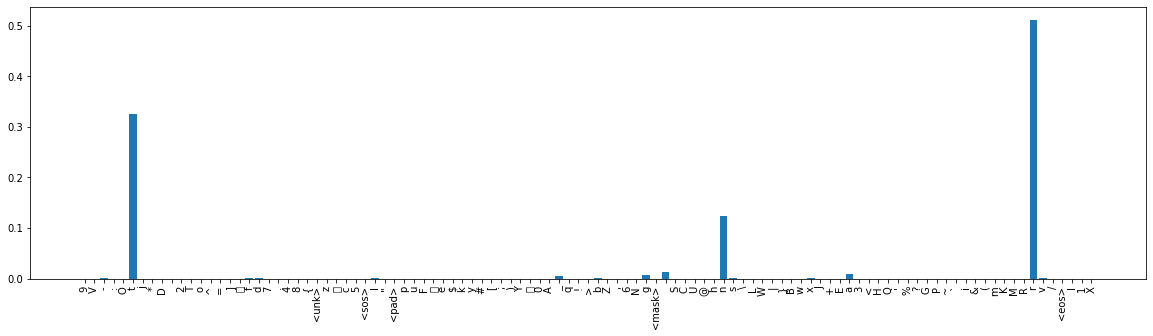

In [54]:
import torch.nn.functional as F
import matplotlib.pyplot as plt

model.eval()
with torch.no_grad():
    input = dataset[0][0].unsqueeze(0)
    output = model(input)
    probs = F.softmax(output[0, -1, :], dim=0)
    
plt.figure(figsize=(20, 5))
plt.bar(tokenizer.decode(torch.tensor(range(len(probs)))), probs)
plt.xticks(rotation=90)
plt.show()

In [55]:
text = tokenizer.decode(dataset[0][0])
text += ["<msk>"]
model.eval()
with torch.no_grad():
    prompt = dataset[0][0].unsqueeze(0)
    text += tokenizer.decode(model.generate(prompt, 50))

In [56]:
text = [t for t in text if t != "<pad>"]
print("".join(text))

<sos>id condition; in a
couple of days it would be fit for harrowing and sowing. Everything was
capital, e<msk>red town to when ther of there, frown _aste off th
